In [7]:
## ChatGPT was used to understand the working of SymPy, its syntax and helper functions

import numpy as np
from scipy import linalg
import sympy as sp
import matplotlib.pyplot as plt

## for continuous time

# using the sympy library to define a continuous time state space system
# variables
t = sp.symbols('t')
x1 = sp.Function('x1')(t)
x2 = sp.Function('x2')(t)
y = sp.Function('y')(t)

# matrices
A = sp.Matrix([[0, 1], [-2, -2]])
B = sp.Matrix([[1], [1]])
C = sp.Matrix([2, 3]).reshape(1, 2)
D = sp.Matrix([0])
x = sp.Matrix([[x1], [x2]])
u = sp.Matrix([1])

# dynamics and observation
dxdt = A * x + B * u
y = C * x + D * u

# solving analytically
solns = sp.dsolve([sp.Eq(x1.diff(t), dxdt[0]), sp.Eq(x2.diff(t), dxdt[1])], ics = {x1.subs(t, 0): 0, x2.subs(t, 0): 0})

# substituting the solution of x into y's equation
y_t = y.subs({x1: solns[0].rhs, x2: solns[1].rhs})
y_t5 = y_t.subs(t, 5)

y(t) = 

⎡   -t       ⎤
⎣5⋅ℯ  ⋅sin(t)⎦

y(5) = 

⎡   -5       ⎤
⎣5⋅ℯ  ⋅sin(5)⎦


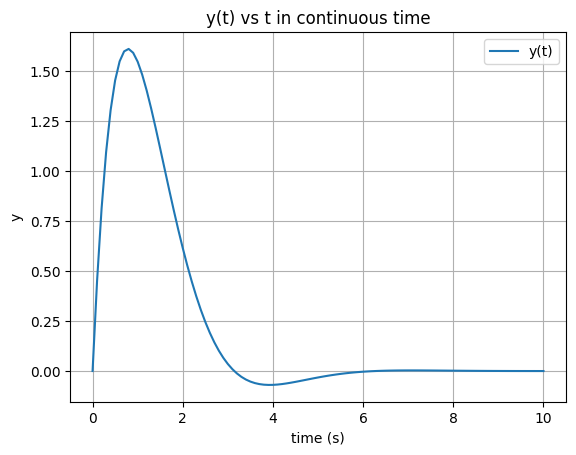

In [8]:
print('y(t) = \n')
sp.pprint(y_t)
print('\ny(5) = \n')
sp.pprint(y_t5)

# converting to numerical solution to plot
y_numeric = sp.lambdify(t, y_t[0], modules='numpy')

# generating time array for plotting
time = np.linspace(0, 10, 101)
y_values = y_numeric(time)

In [34]:
## discrete time

# deriving the matrices for discrete time from the continuous time matrices
A_d = np.array([[0, 1],
              [-2, -2]])
B_d = np.array([[1],
               [1]])
C_d = np.array([[2, 3]])
D_d = np.array([[0]])

xd = np.zeros([2, 1])
xd_new = np.zeros_like(x)
yd = np.zeros([10, 1])

T = 1  # sample time
ud = np.ones([1, 1])  # constant input for all k >= 0

# defining matrices for discrete time system
Ad = linalg.expm(A_d * T)
Bd = np.linalg.inv(A_d) @ (Ad - np.identity(2)) @ B_d
Cd = C_d
Dd = D_d

# x[k + 1] = Ad * x[k] + Bd * u[k]; y[k] = Cd * x[k] + Dd * u[k]
# To get y[5], let's iterate the system 4 times

for i in range(10):
    xd_new = Ad @ xd + Bd * ud
    yd[i] = Cd @ xd + Dd @ u
    xd = xd_new

y(5) = [-0.0323059]


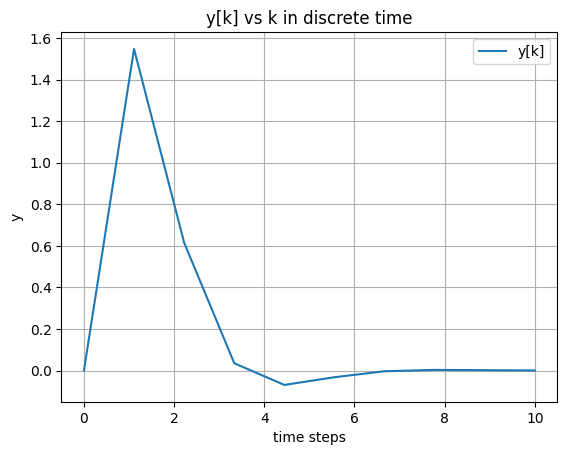

In [39]:
print('y(5) =', yd[5])

# generating time array for plotting
time_d = np.linspace(0, 10, 10)

# plotting
plt.plot(time_d, yd, label='y[k]')
plt.xlabel('time steps')
plt.ylabel('y')
plt.title('y[k] vs k in discrete time')
plt.grid()
plt.legend()
plt.show()

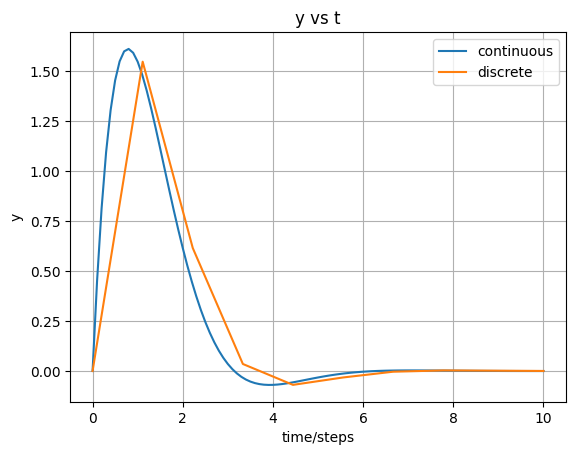

In [40]:
# plotting in same figure
plt.plot(time, y_values, label = 'continuous')
plt.plot(time_d, yd, label = 'discrete')
plt.xlabel('time/steps')
plt.ylabel('y')
plt.title('y vs t')
plt.grid()
plt.legend()
plt.show()